Explotary Data Analysis

In [ ]:
import ast 
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst roles

In [17]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

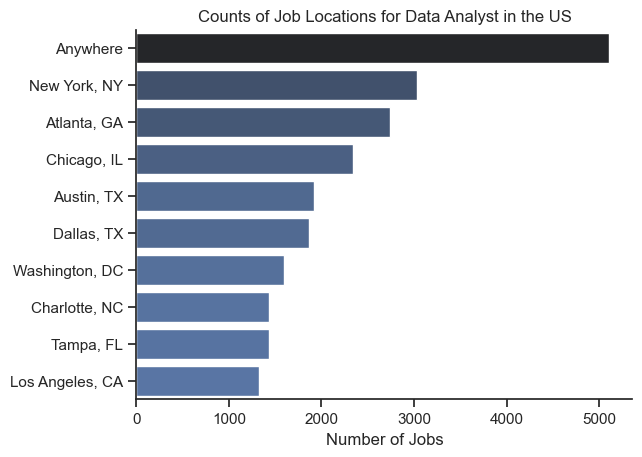

In [18]:
df_plot = df_US_DA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

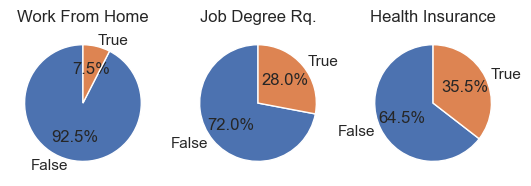

In [19]:
fig, ax = plt.subplots(1, 3)
dict_titles = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Rq.',
    'job_health_insurance': 'Health Insurance'
}

for i, (column, title) in enumerate(dict_titles.items()):
    ax[i].pie(df_US_DA[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=('False', 'True'))
    ax[i].set_title(title)

plt.show()  

Companies to Explore:

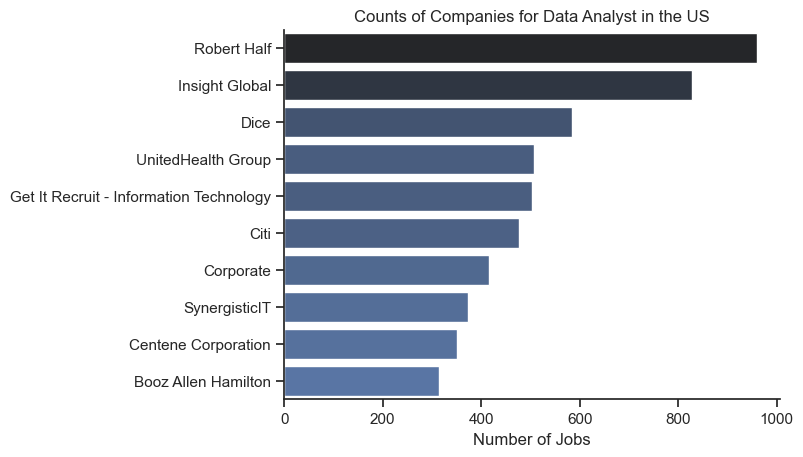

In [20]:
df_plot = df_US_DA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()